# **Importing the librarys**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


age: the age of the patient in years.

sex: the sex of the patient (1 = male, 0 = female).

cp: the type of chest pain the patient experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

trestbps: the resting blood pressure of the patient in mm Hg.

chol: the serum cholesterol level of the patient in mg/dl.

fbs: the fasting blood sugar level of the patient, measured in mg/dl (1 = high, 0 = low).

restecg: the resting electrocardiographic results of the patient (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy).

(Resting electrocardiographic (ECG or EKG) is a non-invasive diagnostic test that records the electrical activity of the heart while the patient is at rest. The test is performed using an electrocardiogram machine, which records the electrical signals produced by the heart through electrodes placed on the chest, arms, and legs.)

thalach: the maximum heart rate achieved by the patient during exercise. exang: whether the patient experienced exercise-induced angina (1 = yes, 0 = no).

oldpeak: the ST depression induced by exercise relative to rest. slope: the slope of the ST segment during peak exercise (1 = upsloping, 2 = flat, 3 = downsloping).

(ST depression induced by exercise relative to rest Oldpeak, also known as ST depression, is a common parameter measured during an exercise stress test to evaluate the presence and severity of coronary artery disease. It represents the amount of ST segment depression that occurs on an electrocardiogram (ECG) during exercise compared to rest.)

ca: the number of major vessels colored by fluoroscopy (0-3).

(he number of major vessels (0-3) colored by fluoroscopy is a parameter that is used to assess the severity of coronary artery disease (CAD) in patients who undergo coronary angiography)

thal: the type of thallium scan performed on the patient (1 = fixed defect, 2 = reversible defect, 3 = normal).

target: the presence of heart disease in the patient (0 = no disease, 1 = disease present).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **EDA**

In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# If the dataset had null values
# df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Outliers

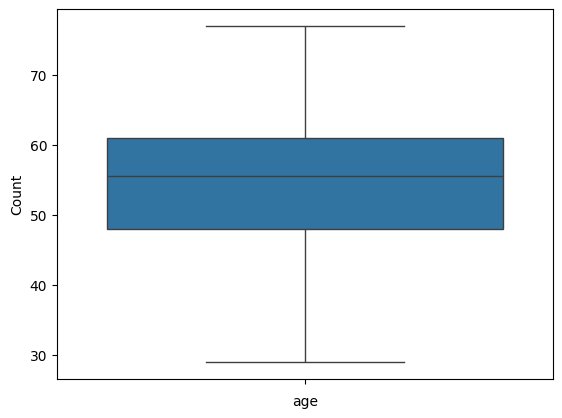

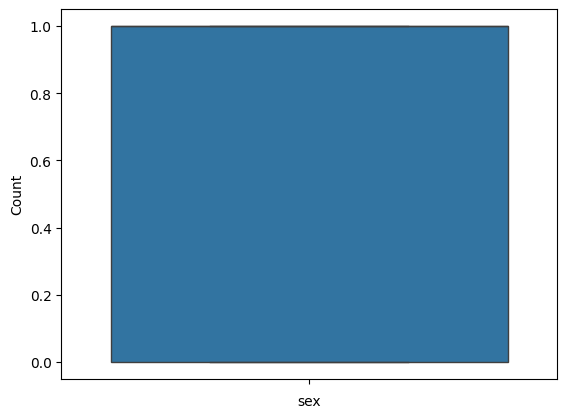

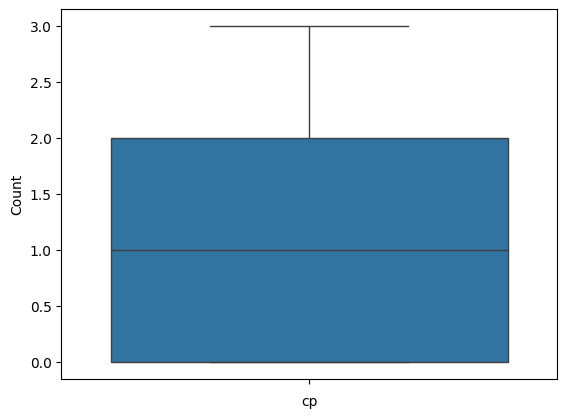

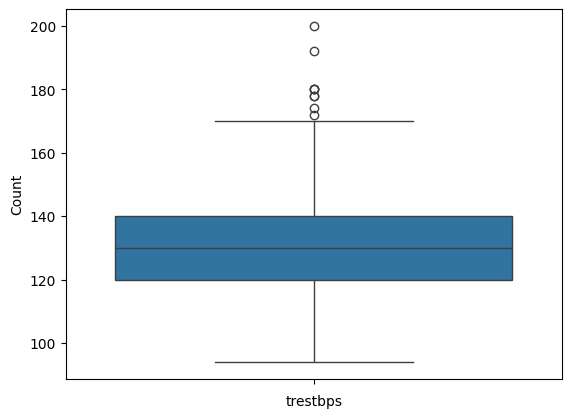

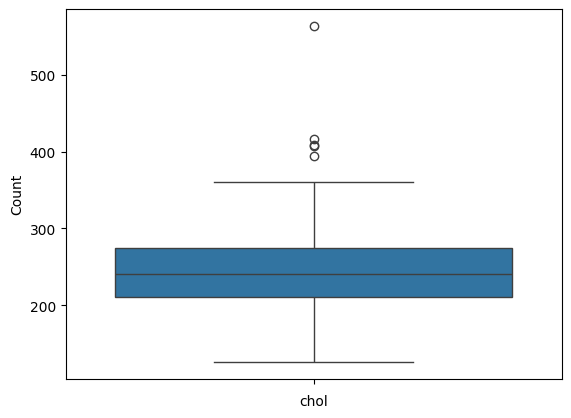

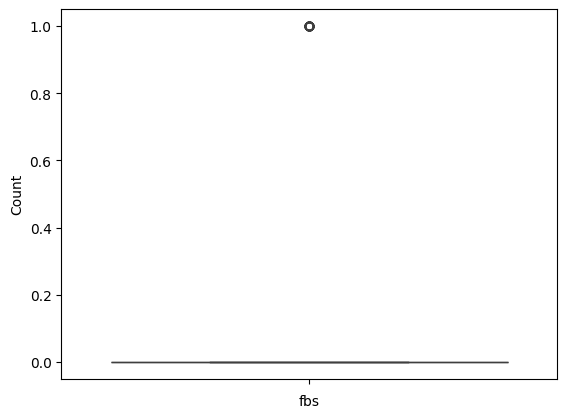

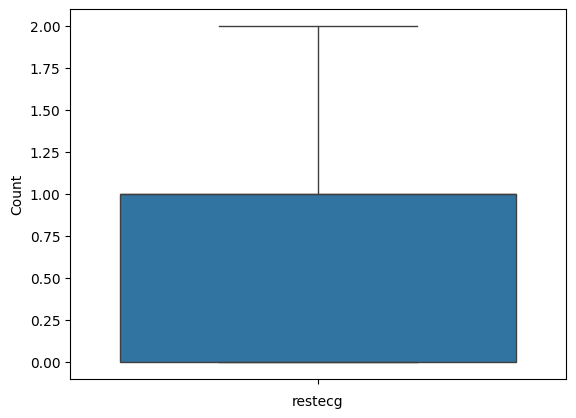

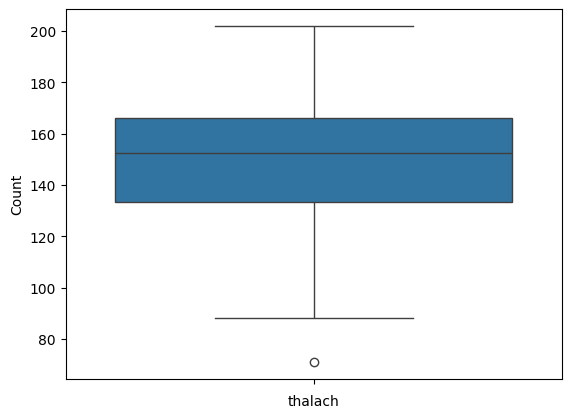

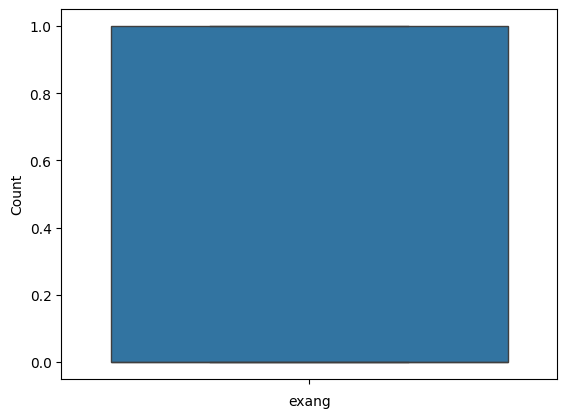

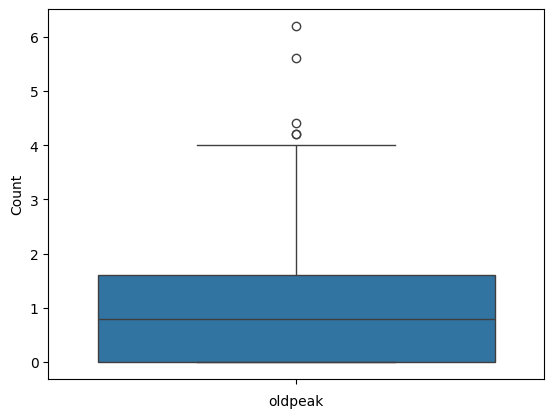

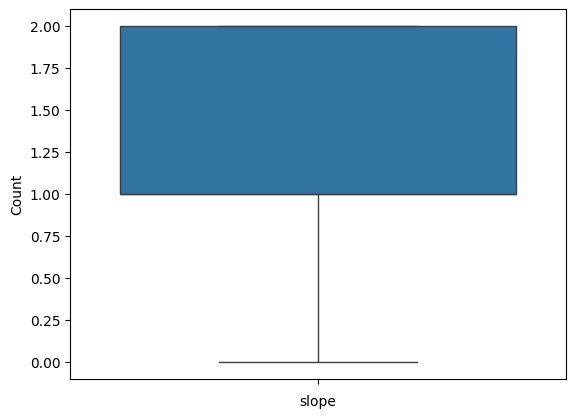

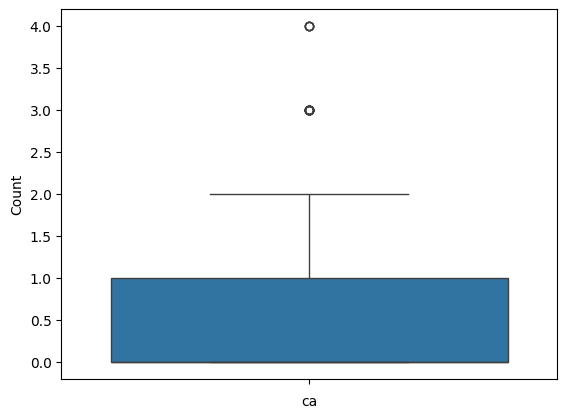

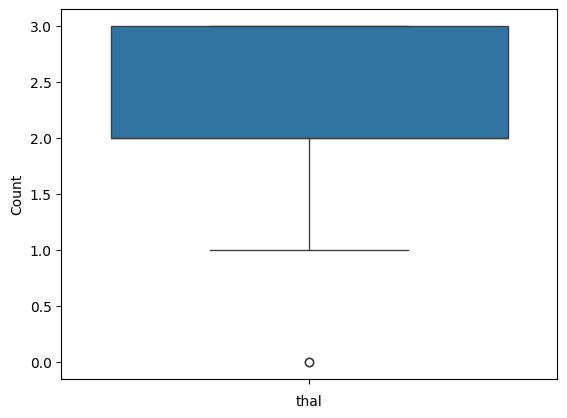

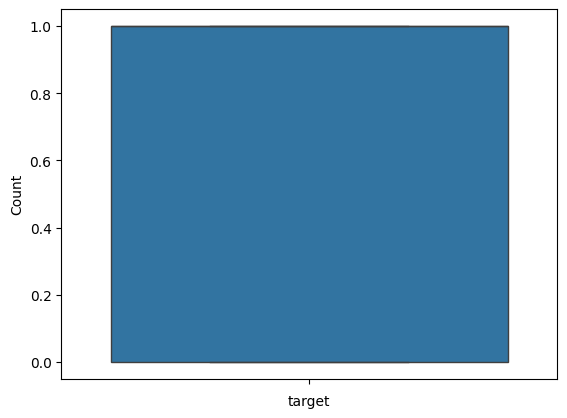

In [15]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [16]:
# we should not worry about outliers in the Decision Tree model as they get ignored while taking/making decision

In [59]:
# out_col = ['x', 'y']

# for col in out_col:
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)

#   IQR = Q3 - Q1

#   LB = Q1 - 1.5*IQR
#   UB = Q3 + 1.5*IQR

#   df = df[(df[col] >= LB) & (df[col] <= UB)]

In [18]:
# label encoding => no object col are there in df

# **Model Building**

## **Splitting the dataset**

In [22]:
X = df.drop('target', axis =1)
y = df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 25)

## **Training the model**

In [53]:
model = DecisionTreeClassifier()

In [54]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [56]:
accuracy_score(y_test, y_pred)*100

78.68852459016394

In [57]:
confusion_matrix(y_test,y_pred)

array([[18,  8],
       [ 5, 30]])

In [58]:
(18+30)/(18+8+5+30)

0.7868852459016393

# **Hyperparameter tuning**

In [60]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for i in max_depth:
  temp_model = DecisionTreeClassifier(max_depth=i)
  temp_model.fit(X_train, y_train)
  y_pred_temp = temp_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred_temp)
  print(f'for the max depth {i} the accuracy of the model is {acc}')

for the max depth 1 the accuracy of the model is 0.6721311475409836
for the max depth 2 the accuracy of the model is 0.6721311475409836
for the max depth 3 the accuracy of the model is 0.7540983606557377
for the max depth 4 the accuracy of the model is 0.7868852459016393
for the max depth 5 the accuracy of the model is 0.7868852459016393
for the max depth 6 the accuracy of the model is 0.7704918032786885
for the max depth 7 the accuracy of the model is 0.7868852459016393
for the max depth 8 the accuracy of the model is 0.7540983606557377
for the max depth 9 the accuracy of the model is 0.7868852459016393
for the max depth 10 the accuracy of the model is 0.7704918032786885


## **Final model**

In [61]:
final_model = DecisionTreeClassifier(max_depth=4)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred_final)*100

78.68852459016394

# **Tree**

In [63]:
from sklearn.tree import plot_tree

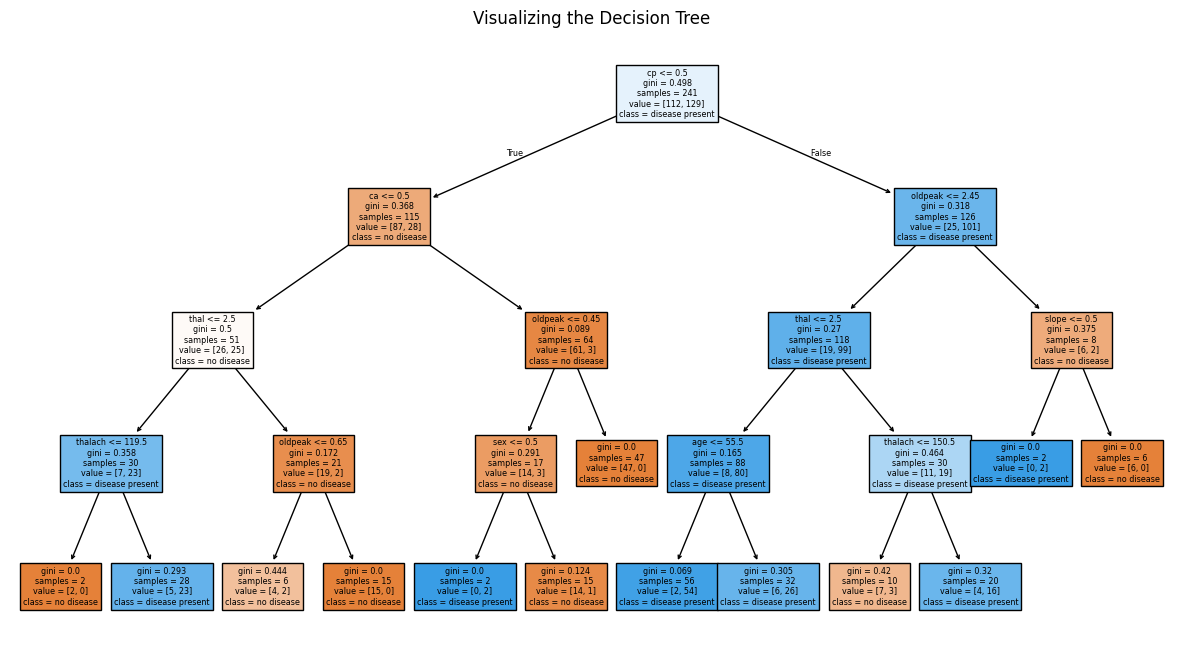

In [72]:
plt.figure(figsize=(15,8))
plot_tree(final_model, filled=True, feature_names=X.columns, class_names=['no disease','disease present'])
plt.title('Visualizing the Decision Tree')
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
accuracy_score(y_test, lr_y_pred)*100 # we have not removed the outliers yet

83.60655737704919

In [81]:
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        26
           1       0.84      0.89      0.86        35

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

